<a href="https://colab.research.google.com/github/betsyvies/food-sales-predictions/blob/main/food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [6]:
sales_predictions = "/content/drive/MyDrive/Data science/Projects/Project 1/sales_predictions_2023.csv"
df = pd.read_csv(sales_predictions)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Cantidad de filas y columnas

Para saber la cantidad de columnas y filas usaré la propiedad .shape. Esta me muestra que hay **8523 filas y 12 columnas**.

In [7]:
df.shape

(8523, 12)

### Tipos de datos de cada variable
Para saber los tipos de datos usaré la propiedad .dtypes y el método .unique porque no quiero que se repitan. Este me muestra que se utilizan tres tipos de datos para las variables. Estos son **float, int, y object.**

In [8]:
df.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

### Revisión de valores duplicados
Para esto utilizo la función .duplicated y la función .sum para saber el total. Esto me devuelve vacio, lo que me asegura que no hay valores duplicados.

In [9]:
df.duplicated().sum()

0

### Revisión de valores faltantes
Hay 2 columnas con valores faltantes de 1463 y 2410 respectivamente. Si el total de filas es 8523 entonces estas columnas tienen un porcentaje de entre 17.17% al 28.28% de valores faltantes lo cual puede afectar considerablemente a mi modelo predictivo si lo elimino, claro que esto también va depender de las métricas que vaya a realizar con las diferentes columnas. Pensando en no afectar en mis metricas futuras y quedandome con la totalidad de los datos aplicaré la imputación.

In [10]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Aplicar imputación para valores faltantes

#### Imputación para los valores faltantes de la columna item weight


Como quiero que mi modelo sea lo más preciso posible, haré la imputación con el promedio de los valores de item_weight pero agrupados por el identificador del producto.

In [11]:
mean_weight_by_identifier = df.groupby("Item_Identifier")['Item_Weight'].mean()

Antes de pasar al siguiente paso revisó si hay valores NaN para saber si hay productos con identificadores unicos con valores NaN. En este caso si hay y son 4. Esto me deja pensando que tendré que tomar una decisión más adelante para estos valores.

In [12]:
mean_weight_by_identifier.isna().sum()

4

Al revisar la información del promedio de los pesos por producto me doy cuenta que esta es una serie de 1539 datos y que el index de los promedios es el identificador. Si paso como atributo "mean_weight_by_identifier" al método .fillna este no reemplazará los NaN de la columna item_weight ya que no tiene el mismo indice. Es por eso que decidí buscar una solución la cual me permita reemplazar todo los NaN de la columna "Item_Weight".


In [13]:
mean_weight_by_identifier.info()

<class 'pandas.core.series.Series'>
Index: 1559 entries, DRA12 to NCZ54
Series name: Item_Weight
Non-Null Count  Dtype  
--------------  -----  
1555 non-null   float64
dtypes: float64(1)
memory usage: 24.4+ KB


Revisando la documentación de panda y apoyo de Stack overflow llege a la conclusión de utilizar el método .map para reemplazar los valores de la columna 'Item_Identifier', ya que los valores de está columna son las llaves de los valores de la serie ***mean_weight_by_identifier***. Ahora sí, tengo una serie con el mismo indice de los valores de la columna item_weight.

In [14]:
mean_weight_series = df['Item_Identifier'].map(mean_weight_by_identifier)
mean_weight_series.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Item_Identifier
Non-Null Count  Dtype  
--------------  -----  
8519 non-null   float64
dtypes: float64(1)
memory usage: 66.7 KB


Una vez reemplazados cada unos de los identificadores por el promedio de los pesos por producto lo paso como argumento a la función .fillna para reemplazar solo los valores NaN de la columna Item_Weight. Esto sin contar los 4 valores con identificador unico y valor NaN.

In [15]:
df['Item_Weight'] = df['Item_Weight'].fillna(mean_weight_series).round(2)

In [16]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Como aún me quedan 4 items con peso NaN y no hay forma de poder obtener estos datos de la forma más acertada. Lo más razonable que veo es reemplazarlos por la media para no eliminarlos porque puede afectar las estadisticas de las otras columnas.

In [17]:
mean_weight = df['Item_Weight'].mean()
df['Item_Weight'] = df['Item_Weight'].fillna(mean_weight).round(2)

Ahora si no tenemos valores faltantes para la columna item_weight

In [18]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Imputación para los valores faltantes de la columna outlet size

A está columna también le aplicare imputación a los valores faltantes. Primero verificare cuales son las outlet_identifier con valores NaN en la columna outlet_size, en este caso en particular son 3 los identificadores, al sumar las cantidades de estos nos da 2410 que son los valores faltantes. Como estos identificadores son unicos no se puede aplicar una moda por ejemplo, así que tendré que buscar otras coincidencias que me sean razonables para imputar.

In [19]:
outlet_size_missing = df['Outlet_Size'].isna()
missing_values = df.loc[outlet_size_missing,:].groupby("Outlet_Identifier")['Outlet_Size'].value_counts(dropna=False)
missing_values

Outlet_Identifier  Outlet_Size
OUT010             NaN            555
OUT017             NaN            926
OUT045             NaN            929
Name: count, dtype: int64

In [20]:
missing_values.sum()

2410

Decidí agrupar las columnas outlet_size y outlet_identifier por las columnas outlet_location_type y outlet_type para encontrar coincidencias. Agruparlas de esta manera me ayudo a descubrir que el punto de venta ***Grocery Store*** con identificador ***OUT019*** tiene un tamaño de tipo ***small*** lo que me hace sentido ya que es una tienda, por está razón es muy probable que ***Grocery Store*** con identificador ***OUT010*** también sea de tamaño ***small***. También pude observar que en la locación ***Tier 1*** hay 2 puntos de ventas small y 1 medium, mientras que en la locación ***Tier 3*** hay 1 punto de venta small, 2 medium y 1 high. Lo que me hace pensar que los tamaños de puntos de ventas se distruyen de acuerdo al area que hay en la locación y que estás áreas se distribuyen de forma ascendente siendo ***Tier 1*** la locación con menor area y ***Tier 3*** la de mayor area. Por lo tanto, según el análisis realizado los 2 puntos de ventas faltantes con identificador ***OUT045*** y ***OUT017*** probablemente sean de tamaño ***medium***.

In [21]:
df.groupby(["Outlet_Location_Type",  "Outlet_Type"])[["Outlet_Size", "Outlet_Identifier"]].value_counts(dropna=False)

Outlet_Location_Type  Outlet_Type        Outlet_Size  Outlet_Identifier
Tier 1                Grocery Store      Small        OUT019               528
                      Supermarket Type1  Medium       OUT049               930
                                         Small        OUT046               930
Tier 2                Supermarket Type1  Small        OUT035               930
                                         NaN          OUT045               929
                                                      OUT017               926
Tier 3                Grocery Store      NaN          OUT010               555
                      Supermarket Type1  High         OUT013               932
                      Supermarket Type2  Medium       OUT018               928
                      Supermarket Type3  Medium       OUT027               935
Name: count, dtype: int64

Para reemplazar cada uno de los valores de ***OUT010, OUT017 y OUT045*** por los valores mencionados arriba, utilizaré el método .apply al cual le pasare una función como argumento. Esta función reemplazará cada valor que sea NaN con name ***OUT017*** o ***OUT045*** por ***Medium*** y si es ***OUT010*** por ***Small***. De no ser NaN lo remplazará por vacio. El reemplazar los valores de las otras filas no afectaran al resultado final porque para eso se usará .fillna.

In [22]:
def replace_nan(size_counts):
    if size_counts.isna().any():
        if size_counts.name in ['OUT017', 'OUT045']:
            return 'Medium'
        elif size_counts.name == 'OUT010':
            return 'Small'
    else:
      return ''

outlet_size_replace_nan = df.groupby('Outlet_Identifier',  group_keys=True)['Outlet_Size'].apply(replace_nan)

Luego utilizaré el método .map para reemplazar los valores de la columna ***outlet_identifier***, ya que los valores de está columna son las llaves de los valores de la serie ***outlet_size_replace_nan***. Hago esto para tener una serie con el mismo indice que los valores de la columna ***outlet_size***.

In [23]:
outlet_identifier_series = df['Outlet_Identifier'].map(outlet_size_replace_nan)
outlet_identifier_series.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Outlet_Identifier
Non-Null Count  Dtype 
--------------  ----- 
8523 non-null   object
dtypes: object(1)
memory usage: 66.7+ KB


Una vez listo el proceso anterior lo paso como argumento a la función .fillna para reemplazar solo los valores NaN de la columna Outlet_Size.

In [24]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(outlet_identifier_series)

Para corroborar que solo los valores con identificadores ***OUT010***, ***OUT017*** y ***OUT045*** cambiaron de NaN a ***small*** y ***medium*** respectivamente. Aplicamos el mismo agrupamiento del análisis anterior. Al revisar el resultado podemos corroborar que estos se modificaron correctamente y los demás continúan con sus valores anteriores.

In [25]:
df.groupby(["Outlet_Location_Type",  "Outlet_Type"])[["Outlet_Size", "Outlet_Identifier"]].value_counts(dropna=False)

Outlet_Location_Type  Outlet_Type        Outlet_Size  Outlet_Identifier
Tier 1                Grocery Store      Small        OUT019               528
                      Supermarket Type1  Medium       OUT049               930
                                         Small        OUT046               930
Tier 2                Supermarket Type1  Small        OUT035               930
                                         Medium       OUT045               929
                                                      OUT017               926
Tier 3                Grocery Store      Small        OUT010               555
                      Supermarket Type1  High         OUT013               932
                      Supermarket Type2  Medium       OUT018               928
                      Supermarket Type3  Medium       OUT027               935
Name: count, dtype: int64

### Confirmación de que no hay valores faltantes
Una vez que tratamos los valores faltantes con el método de inputación corroboramos que no hay valores faltantes en nuestro dataframe.

In [26]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Arreglo de cualquier categoría inconsistente en los datos
Dado que las únicas columnas con elementos categoricos que aún no he revisado son item_fat_content y item_type procedere a evaluarlos, viendo si tienen datos inconsistentes.

Primero empiezo contando los valores que hay en la columna item_fat_content.

In [27]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

 Lo cual me muestra que hay tres maneras de nombrar low fat y dos de regular, para que estos valores sean consistentes los remplazaré por 'Low Fat' y 'Regular', ya que serán los datos con los que decido trabajar en esta columna.

In [28]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], ['Low Fat', 'Low Fat', 'Regular'])

Al volver hacer el conteo puedo observar que solo hay dos categorias, lo cual le dará mayor consistencia a mi análisis futuro.

In [29]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Por último, evaluo la columna item_type, la cual no tiene inconsistencias así que la dejara como esta.

In [30]:
df["Item_Type"].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

### Estadísticas resumidas de columnas númericas
Para esto usaré el método .describe ya que por defecto me genera las estadisticas descriptivas de forma resumida. Se puede ver que el item con mayor peso es de 12.87, también que el precio máximo de venta al público del producto es 140.99. Mientras que el promedio de las ventas de un producto en tienda es de 2181.29. Sería interesante saber si el promedio de ventas esta relacionado con los productos y el precio de venta.

In [31]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875637,0.066132,140.992782,1997.831867,2181.288914
std,4.644867,0.051598,62.275067,8.371760,1706.499616
min,4.560000,0.000000,31.290000,1985.000000,33.290000
25%,8.780000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Estadísticas con gráficos

#### Histograma



Se puede observar que hay una mayor cantidad de productos con peso 7.5 y una menor cantidad de productos en los extremos de la districución, de un 5.5 a 5 y 21.3. Se podría deducir que al ser productos con pesos extremos, muy ligeros o muy pesados, las cantidades de estos son menores. Tendría que revisar si esto se relaciona con las ventas o el espacio del producto en tienda.

In [32]:
weights = df["Item_Weight"]

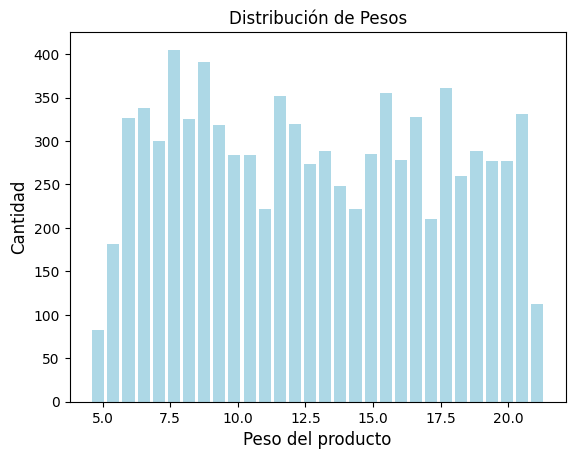

In [33]:
plt.hist(weights, bins=30, rwidth=0.8, color='lightblue')

plt.xlabel('Peso del producto', fontsize = 12);
plt.ylabel('Cantidad', fontsize = 12);
plt.title('Distribución de Pesos')

plt.show()

#### Boxplot


Me interesa saber si hay alguna diferencia notable entre el promedio de ventas por articulo y los tamaños de tiendas donde estos se venden (small, medium y high). Por lo cual aplicaré el grafico boxplot para ver como se relacionan estas dos varaibles.

Para obtener el promedio por articulo en cada tamaño de tienda los agruparé. Hay que recordar que un articulo se puede repetir más de una vez en una misma categoría de "Outlet_Size", es por eso que para estos casos obtendre el promedio.

In [34]:
df_mean_by_outlet_sales = df.groupby(["Outlet_Size", "Item_Identifier"])["Item_Outlet_Sales"].mean().reset_index()
df_mean_by_outlet_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3926 entries, 0 to 3925
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Outlet_Size        3926 non-null   object 
 1   Item_Identifier    3926 non-null   object 
 2   Item_Outlet_Sales  3926 non-null   float64
dtypes: float64(1), object(2)
memory usage: 92.1+ KB


Una vez que tengo el promedio de "Item_Outlet_Sales" agrupado por "Outlet_Size" y "Item_Identifier" procederé a filtrar estos por cada valor de los tamaños en tiendas (small, medium y high).

In [35]:
small_filter = df_mean_by_outlet_sales['Outlet_Size']=='Small'
medium_filter = df_mean_by_outlet_sales['Outlet_Size']=='Medium'
high_filter = df_mean_by_outlet_sales['Outlet_Size']=='High'

In [43]:
df_mean_by_outlet_sales.loc[small_filter,'Item_Outlet_Sales'].median()

1418.8198

Al revisar las 3 cajas podemos ver que el rango intercuartilico de ventas en las tiendas de tamaño medium va de 1500 a 3500, lo que quiere decir que el 50% de los datos de esta caja deberían ser analizados a mayor de talle, ya que este tamaño de tiendas tienden a tener mayores ventas de los articulos. Siendo la mediana de ventas de productos 2298.6 mayor a las de tamaño small y ligeramente mayor a high. También podemos ver que los casos aislados de los productos vendidos en la tienda de tamaño medium es menor a los de small y high.

Cabe resaltar que en las tres boxplots podemos ver que hay una tendencia hacia valores más altos de ventas guiándonos de la parte superior de la distribución.

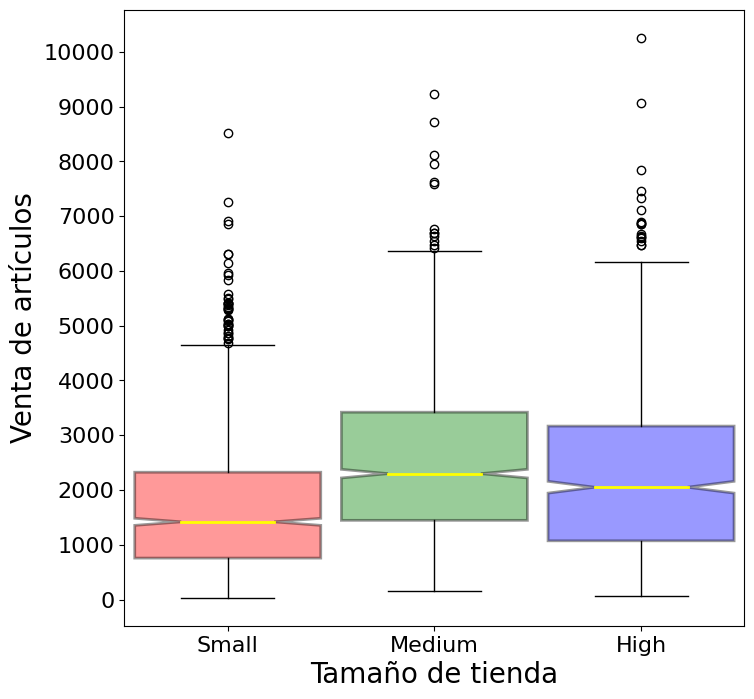

In [57]:
small = df_mean_by_outlet_sales.loc[small_filter,'Item_Outlet_Sales'].values
medium = df_mean_by_outlet_sales.loc[medium_filter,'Item_Outlet_Sales'].values
high = df_mean_by_outlet_sales.loc[high_filter,'Item_Outlet_Sales'].values

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
boxplots = axes.boxplot([small, medium, high],
           notch = True,
           labels=['Small', 'Medium', 'High'],
           widths = .9,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
# Change colors
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
boxplot2 = boxplots['boxes'][1]
boxplot2.set_facecolor('green')

plt.yticks(np.arange(0, 11000, 1000))

# Add font size and labels
plt.xlabel('Tamaño de tienda', fontsize = 20);
plt.ylabel('Venta de artículos', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

#### Mapa de calor

Aplicamos este gráfico para encontrar correlación entre nuestras variables númericas. Podemos ver que hay una correlación moderada entre el MRP (precio máximo de venta al público) y Outlet Sales (ventas del producto en una tienda particular). También hay una correlación negativa baja entre Visibility (porcentaje de área total de exposición) y Outlet Sales.

Al tener una correlación moderada entre el MRP y Outlet Sales, podríamos decir que el cambio de los precios están asociados con los cambios moderados en las ventas, ya que estos cambios en las ventas también se ven afectados de otros factores. De igual forma, la relación de estas dos variables tiene un equilibrio delicado porque un aumento excesivo en el precio puede llevar a una disminución de las ventas y viceversa. Así que deberá encontrar un equilibrio si desea maximizar los ingresos por ventas mediante el aumento de los precios.

In [41]:
corr = df[["Item_Weight",	"Item_Visibility",	"Item_MRP",	"Item_Outlet_Sales"]].corr()

<Axes: >

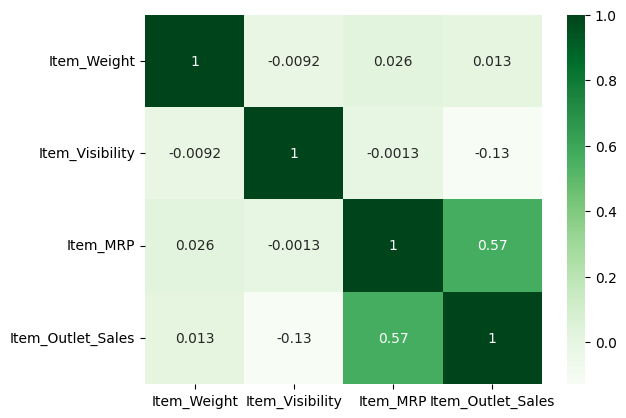

In [42]:
sns.heatmap(corr, cmap = 'Greens', annot=True)